In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:

os.chdir('../')

# read data
data = pd.read_csv('Cleaned_data.csv')

In [5]:
X = data.drop(columns=["Species_Population"])
y = data["Species_Population"]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [7]:
# Define the parameter grid for GridSearchCV
param_grid = {
    "n_neighbors": list(range(1, 31)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy", n_jobs=-1
)

In [8]:
# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_
print(best_knn)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')


Accuracy: 0.7081
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.37      0.41        27
           1       0.94      0.82      0.88        39
           2       0.97      0.79      0.87        47
           3       0.82      0.66      0.73        35
           4       0.56      0.65      0.60        31
           5       0.40      0.50      0.45        34
           6       0.77      0.92      0.84        25
           7       0.81      0.98      0.88        43
           8       0.71      0.86      0.78        35
           9       0.50      0.37      0.42        30

    accuracy                           0.71       346
   macro avg       0.69      0.69      0.69       346
weighted avg       0.72      0.71      0.71       346



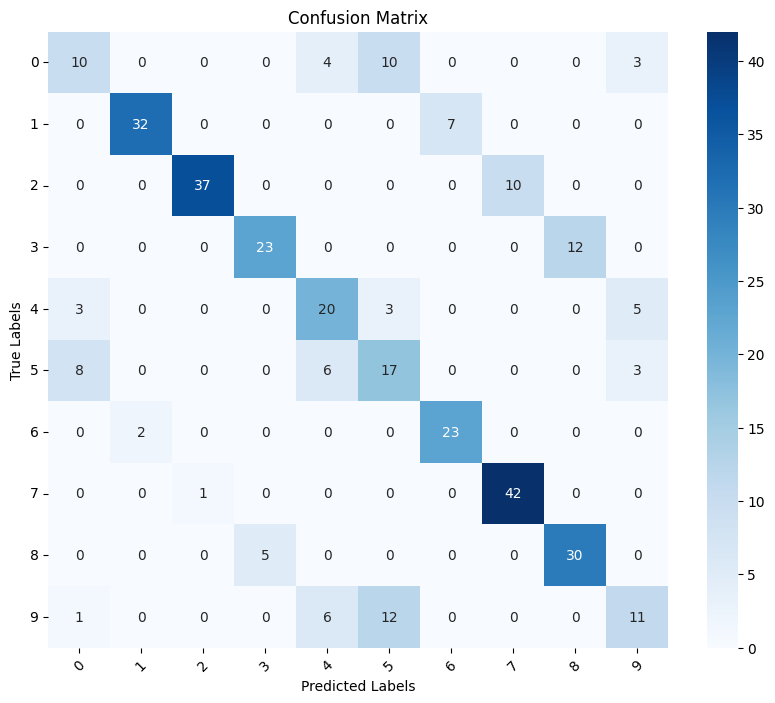

In [9]:
# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")


# Print classification report

print("Classification Report:")
print(classification_report(y_test, y_pred))


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

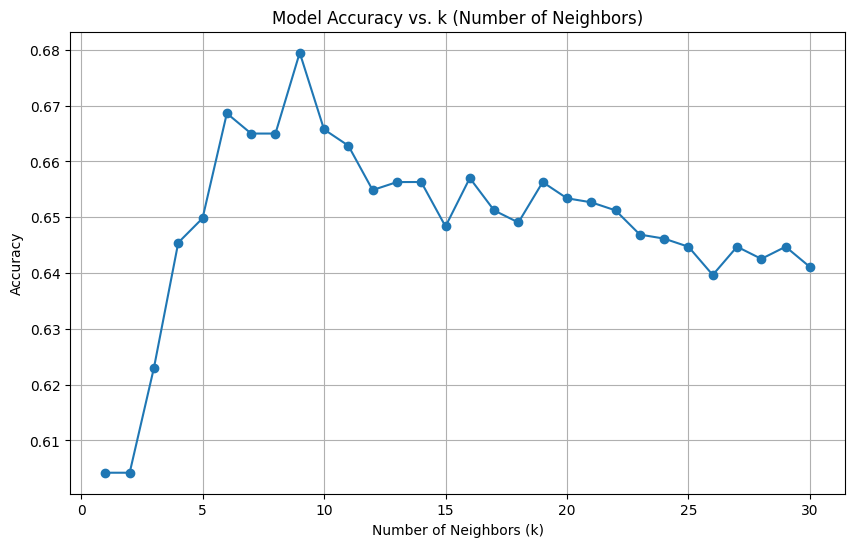

In [10]:
# Extract grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Filter results for plotting
results = results[results["param_weights"] == "distance"]
results = results[
    results["param_metric"] == "manhattan"
] 

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(results["param_n_neighbors"], results["mean_test_score"], marker="o")
plt.title("Model Accuracy vs. k (Number of Neighbors)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()